# Práctica 4 Parte II. Clustering jerárquico en sklearn

Antes de empezar a ver cómo funciona el clustering jerárquico en la librería sklearn, vamos a fijar la notación:
- Tenemos n instancias con m descriptores cada una, almacenadas en X
- Llamaremos Z al vector que contiene la información de enlazamiento

El proceso de clústering jerárquico en sklearn consta de dos partes. En la primera se calcula el dendograma para ver cuántos clústeres hay en el dataset. En la segunda se lleva a cabo el proceso de clustering.

## Generando el dendograma

Comenzamos importando las librerías que vamos a utilizar.

In [1]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import numpy as np
%matplotlib inline

A continuación vamos a generar los datos de nuestra muestra. Como existe una componente aleatoria a la hora de generar la muestra, vamos a fijar la semilla para poder reproducir los resultados

In [2]:
np.random.seed(4711)

Vamos a generar dos clusters: el clúster a con 100 puntos y el clúster b con 50. Generamos 100 puntos aleatorios siguiendo una distribución normal. El primer valor que le pasamos ([10,0]) indica la coordenada donde es más probable que se generen los puntos de la muestra. El siguiente valor ([[3, 1], [1, 4]]) indica la covarianza. Más información sobre esta manera de generar puntos aleatorios viene descrita en https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html

In [3]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])

Generamos 50 puntos aleatorios siguiendo una distribución normal

In [4]:
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])

Concatenamos ambos datasets.

In [5]:
X = np.concatenate((a, b),)

Veamos el dataset que hemos generado

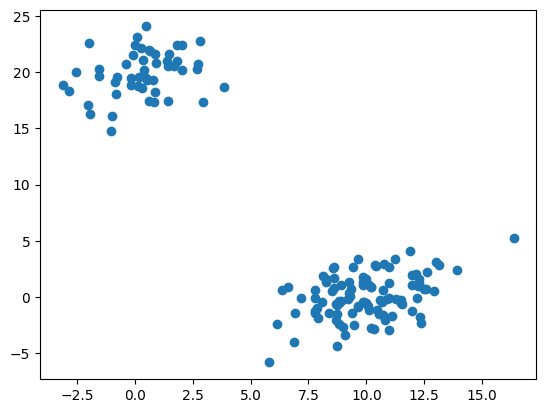

In [6]:
plt.scatter(X[:,0], X[:,1])
plt.show()

Veámos ahora como se realiza el clustering jerárquico. El primer paso consiste en definir el enlazado. En este caso utilizaremos ward como método de enlazado. Además de ward se pueden utilizar los valores 'single', 'complete', y 'average'.

In [7]:
Z = linkage(X,'ward')

Veámos ahora el dendograma que se genera utilizando el enlazado de Ward.

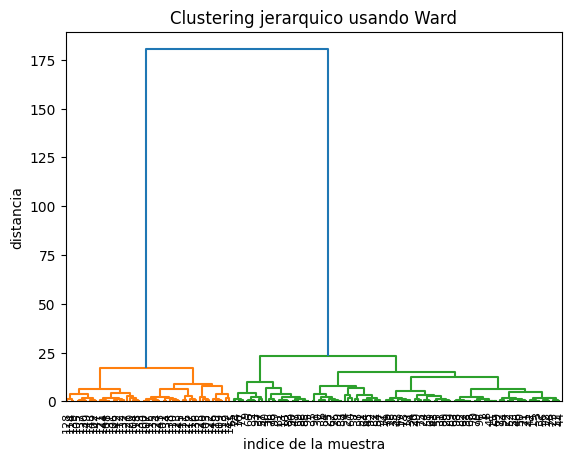

In [8]:
plt.title('Clustering jerarquico usando Ward')
plt.xlabel('indice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

***
### Ejercicio
Utilizando los datos almacenados en X, genera los dendrogramas utilizando los métodos de enlazado 'single', 'complete', y 'average'.

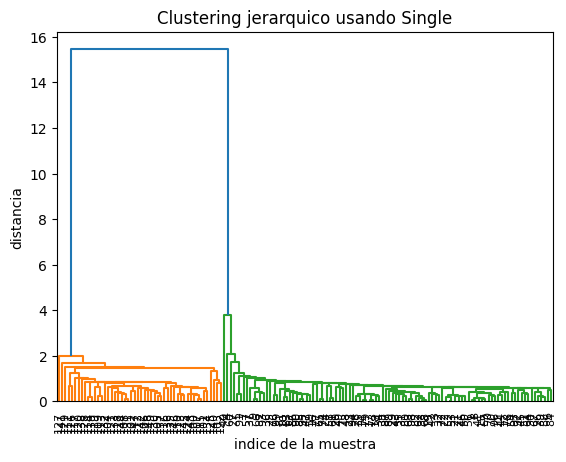

In [10]:
Z = linkage(X,'single')

plt.title('Clustering jerarquico usando Single')
plt.xlabel('indice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

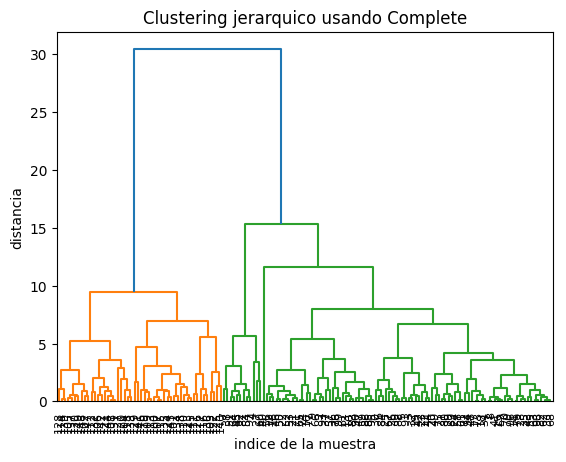

In [11]:
Z = linkage(X,'complete')

plt.title('Clustering jerarquico usando Complete')
plt.xlabel('indice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

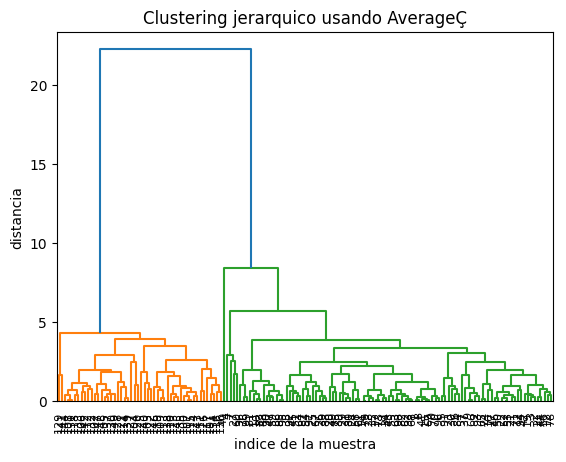

In [12]:
Z = linkage(X,'average')

plt.title('Clustering jerarquico usando Average')
plt.xlabel('indice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

***

## Construyendo los clústeres

Pasamos ahora a construir los clústeres. En el dendograma generado utilizando Ward, hemos visto que hay claramente dos clústeres, por lo que podemos pasar a utilizar el clústering jerárquico para agrupar los puntos. Para ello debemos construir una instancia de la clase ```AgglomerativeClustering``` a la cual le pasamos el método de enlazado y el número de clústeres.

In [13]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=2)

Ahora podemos agrupar los clústeres usando el método fit como vimos con los otros algoritmos de clustering.

In [14]:
clusters = clustering.fit(X)
labels = clusters.labels_

Finalmente, el siguiente código nos sirve para visualizar los clústeres.

In [15]:
def plot_clusters(X,labels):
    colors = cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))
    for i,l in enumerate(np.unique(labels)):
        Y = np.array([list(X[j]) for j,a in enumerate(labels) if a == l])
        plt.scatter(Y[:,0], Y[:,1],color=colors[i])
    plt.show()

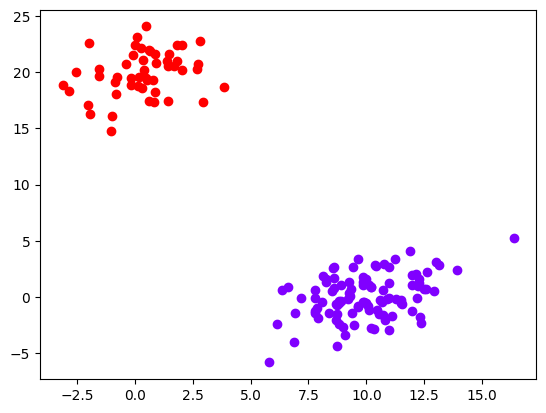

In [16]:
plot_clusters(X,labels)

### Ejercicio

¿Se obtienen los mismos resultados si utilizamos los otros enlazados?

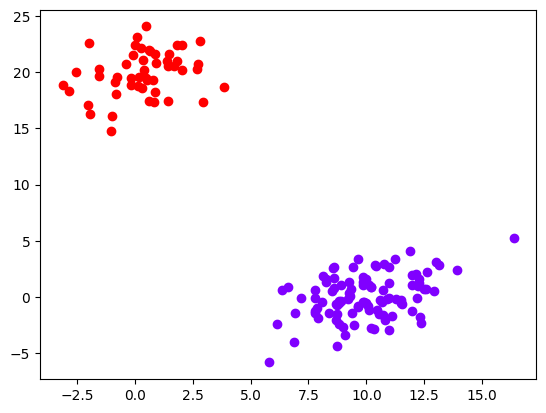

In [17]:
clustering = AgglomerativeClustering(linkage='single', n_clusters=2)

clusters = clustering.fit(X)
labels = clusters.labels_

plot_clusters(X,labels)

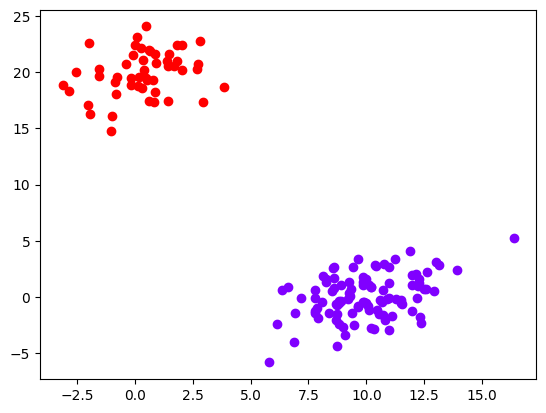

In [18]:
clustering = AgglomerativeClustering(linkage='complete', n_clusters=2)

clusters = clustering.fit(X)
labels = clusters.labels_

plot_clusters(X,labels)

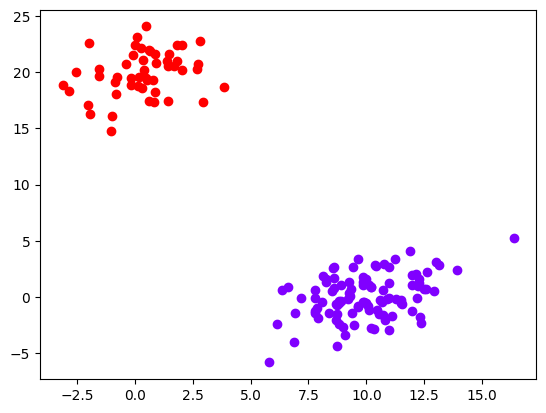

In [19]:
clustering = AgglomerativeClustering(linkage='average', n_clusters=2)

clusters = clustering.fit(X)
labels = clusters.labels_

plot_clusters(X,labels)

**Respuesta**

Como podemos ver, se obtienen los mismos resultados utilizando otros enlazados.

***

### Ejercicio

Repite lo que hemos hecho hasta ahora para el dataset de iris que vimos en la práctica anterior. Debido a que en el dataset iris, las instancias se representan con 4 descriptores, no será posible visualizar los clústeres con la función ```plot_clusters```.

***

## Entrega

Recuerda guardar tus cambios en tu repositorio utilizando la opción "Save File in GitHub..." del menú File.